In [1]:
!pip install scikit-plot
!pip install wordcloud

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import os

In [5]:
# Load your dataset
df = pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\TASK-3\spam.csv', encoding='latin1')

In [6]:
df.head(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [7]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.shape

(5572, 5)

In [10]:
# Data cleaning and preprocessing
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.columns = ['heading','content']

In [11]:
df.head(10)

,heading,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
df_label = df['heading']
df_label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: heading, Length: 5572, dtype: object

In [13]:
# Define stopwords
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS
# Separate ham and spam datasets
ham_dataset = df[df.heading == 'ham']
spam_dataset = df[df.heading == 'spam']
ham_words = ' '
spam_words = ' '
# Generate wordclouds for ham and spam
for words in ham_dataset.content:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.content:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "
# Function to generate and display wordcloud
def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()



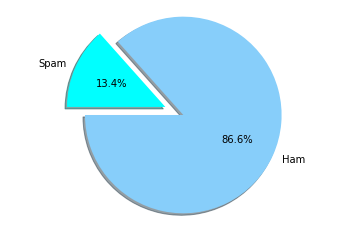

In [14]:
# Visualize the distribution of ham and spam in the dataset

count_Class = pd.value_counts(df.heading, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.axis('equal')
plt.show()

In [15]:
# Split the dataset into training and testing sets
train_set, test_set, train_label, test_label = train_test_split(df, df_label, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(3733, 2)
(1839, 2)

The Trainset consists of 3733 records and 2 features

The Testset consists of 1839 records and 2 features


In [16]:
# Vectorize the text data using CountVectorizer
countvect = CountVectorizer(ngram_range = (2,2) )
x_counts = countvect.fit(train_set.content)

# preparing for training set
x_train_df = countvect.transform(train_set.content)

# preparing for test set
x_test_df = countvect.transform(test_set.content)

The accuracy of Naive Bayes clasifier is 97.87928221859707%

 [[1581    6]
 [  33  219]]


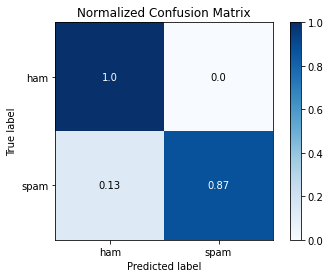

In [17]:
# Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(x_train_df,train_set.heading)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
# Evaluate Naive Bayes Classifier
accuracy = accuracy_score(test_set.heading, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.heading, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.heading, predicted_values_NB, normalize = True)
plt.show()

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of K-Nearest Neighbors algorithm is 89.07014681892332%

 [[1587    0]
 [ 201   51]]


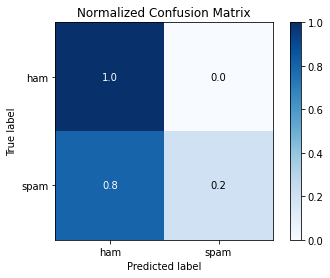

In [18]:
# K-Nearest Neighbors (KNN) Classifier
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.heading)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
# Evaluate KNN Classifier
accuracy_KNN = accuracy_score(test_set.heading, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.heading, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.heading, predicted_values_KNN, normalize = True)
plt.show()

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']

The accuracy of Decision Tree learning is 96.03045133224578%

 [[1576   11]
 [  62  190]]


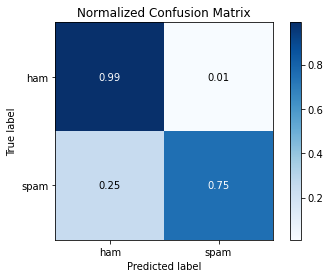

In [19]:
# Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.heading)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
# Evaluate Decision Tree Classifier
accuracy_DT = accuracy_score(test_set.heading, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.heading, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.heading, predicted_values_DT, normalize = True)
plt.show()

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of Support Vector Machine (SVM) is 94.07286568787384%

 [[1587    0]
 [ 109  143]]


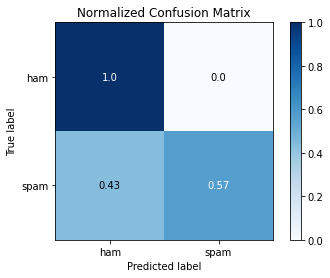

In [20]:
# Support Vector Machine (SVM) Classifier
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.heading)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
# Evaluate SVM Classifier
accuracy_SVM = accuracy_score(test_set.heading, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.heading, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.heading, predicted_values_SVM, normalize = True)
plt.show()

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of Random Forest is 95.86731919521479%

 [[1587    0]
 [  76  176]]


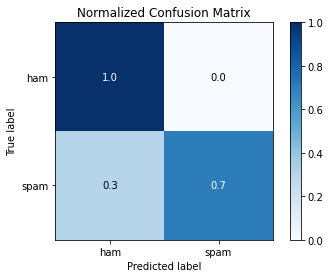

In [21]:
# Random Forest Classifier
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
RF.fit(x_train_df, train_set.heading)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
# Evaluate Random Forest Classifie
accuracy_RF = accuracy_score(test_set.heading, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.heading, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.heading, predicted_values_RF, normalize = True)
plt.show()

,Algorithms,Percentage
0,Naive Bayes,97.879282
1,K-Nearest Neighbors algorithm,89.070147
2,Decision Tree learning,96.030451
3,Support Vector Machine (SVM),94.072866
4,Random Forest,95.867319


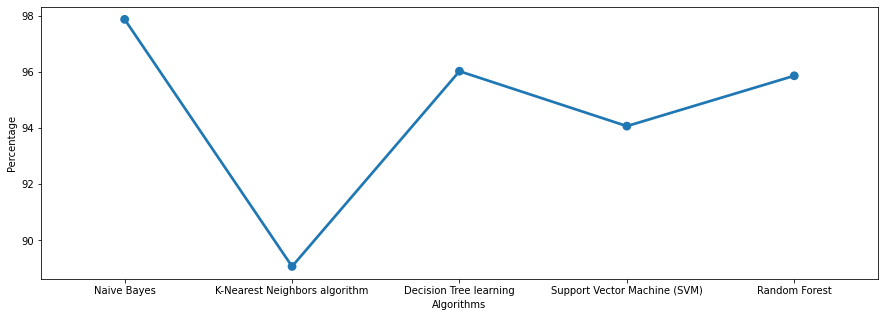

In [22]:
# Display the accuracy results for different classifiers
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);